In [2]:
import os
import uuid
import time
import cv2

In [3]:
IMAGES_PATH = os.path.join('Data','Images')
number_images=30

In [5]:
cap = cv2.VideoCapture(0)
for imgnum in range(number_images):
    print(f'Collecting image {imgnum}')
    ret,frame = cap.read()
    imgname = os.path.join(IMAGES_PATH,f'{uuid.uuid1()}.jpg')
    cv2.imwrite(imgname,frame)
    cv2.imshow('frame',frame)
    time.sleep(0.5)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

In [6]:
!labelme

In [8]:
import tensorflow as tf
import json
import numpy as np
import matplotlib.pyplot as plt

In [9]:
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu,True)

In [10]:
tf.test.is_gpu_available()

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


True

In [11]:
images=tf.data.Dataset.list_files('./Data/Images/*.jpg',shuffle=False)

In [12]:
len(images)

130

In [13]:
images.as_numpy_iterator().next()

b'./Data/Images/10a6d220-54ab-11ee-a47d-80d21deeeff4.jpg'

In [14]:
def load_img(x):
    byte_img = tf.io.read_file(x)
    img = tf.io.decode_jpeg(byte_img)
    return img

In [15]:
images = images.map(load_img)

array([[[135, 150, 155],
        [135, 150, 155],
        [136, 149, 155],
        ...,
        [148, 152, 155],
        [149, 153, 156],
        [148, 152, 155]],

       [[133, 148, 153],
        [133, 148, 153],
        [135, 148, 154],
        ...,
        [148, 152, 155],
        [148, 152, 155],
        [147, 151, 154]],

       [[135, 148, 156],
        [135, 148, 156],
        [135, 148, 156],
        ...,
        [149, 153, 156],
        [149, 153, 156],
        [149, 153, 156]],

       ...,

       [[  6,   8,   7],
        [  5,   7,   6],
        [  7,   9,   8],
        ...,
        [ 28,  26,  29],
        [ 25,  23,  26],
        [ 32,  30,  33]],

       [[  8,  10,   9],
        [  6,   8,   7],
        [  7,   9,   8],
        ...,
        [ 24,  22,  25],
        [ 28,  26,  29],
        [ 24,  22,  25]],

       [[  4,   6,   5],
        [  1,   3,   2],
        [  1,   3,   2],
        ...,
        [ 19,  17,  20],
        [ 24,  22,  25],
        [ 26,  24,  27]]], dtype=uint8)
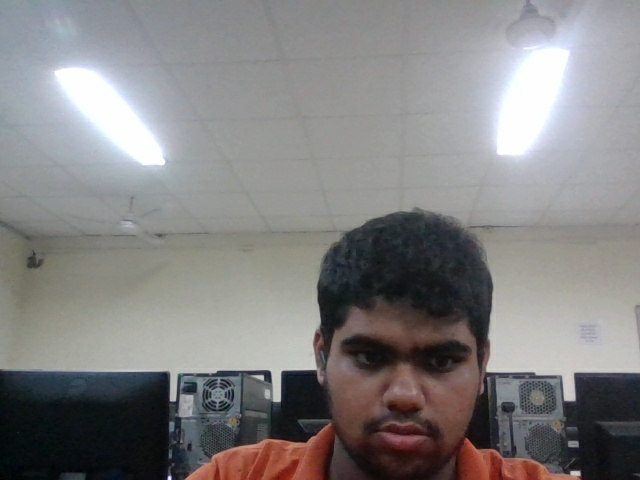

In [16]:
images.as_numpy_iterator().next()

In [17]:
image_generator = images.batch(4).as_numpy_iterator()

In [18]:
plot_images = image_generator.next()

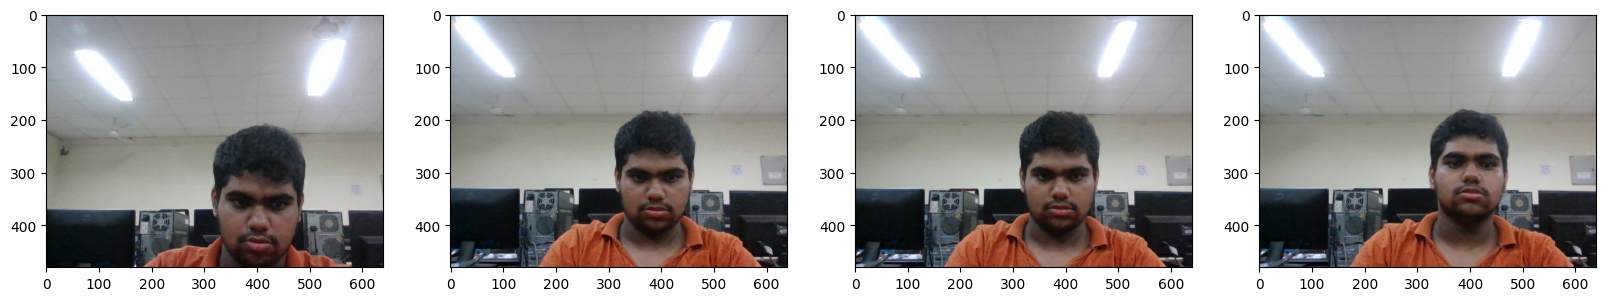

In [19]:
fig,ax = plt.subplots(ncols=4,figsize=(20,20))
for idx, image in enumerate(plot_images):
    ax[idx].imshow(image)
plt.show()

In [20]:
for folder in ['train','test','val']:
    for file in os.listdir(os.path.join('Data',folder,'images')):
        filename = file.split('.')[0]+'.json'
        existing_filepath = os.path.join('Data','Labels',filename)
        if os.path.exists(existing_filepath):
            new_filepath = os.path.join('Data',folder,'labels',filename)
            os.replace(existing_filepath,new_filepath)

In [21]:
import albumentations as alb

In [22]:
augmentor = alb.Compose([alb.RandomCrop(width=450,height=450),
                         alb.HorizontalFlip(p=0.5),
                         alb.RandomBrightnessContrast(p=0.2),
                         alb.RandomGamma(p=0.2),
                         alb.RGBShift(p=0.2),
                         alb.VerticalFlip(p=0.5)],
                         bbox_params = alb.BboxParams(format='albumentations',
                                                      label_fields=['class_labels']))

In [23]:
img = cv2.imread(os.path.join('Data','train','images','10a6d220-54ab-11ee-a47d-80d21deeeff4.jpg'))

In [24]:
img.shape

(480, 640, 3)

array([[[158, 150, 137],
        [157, 149, 136],
        [157, 149, 136],
        ...,
        [156, 152, 151],
        [157, 152, 149],
        [157, 152, 149]],

       [[156, 148, 135],
        [156, 148, 135],
        [156, 148, 135],
        ...,
        [155, 151, 150],
        [156, 151, 148],
        [156, 151, 148]],

       [[156, 148, 135],
        [156, 148, 135],
        [156, 148, 135],
        ...,
        [157, 153, 152],
        [158, 153, 150],
        [157, 152, 149]],

       ...,

       [[ 10,   8,   8],
        [  9,   7,   7],
        [ 10,   8,   8],
        ...,
        [ 32,  27,  29],
        [ 29,  24,  26],
        [ 36,  31,  33]],

       [[ 11,   9,   9],
        [ 10,   8,   8],
        [ 10,   8,   8],
        ...,
        [ 27,  21,  26],
        [ 31,  25,  30],
        [ 28,  22,  27]],

       [[  8,   6,   6],
        [  5,   3,   3],
        [  5,   3,   3],
        ...,
        [ 22,  16,  21],
        [ 26,  20,  25],
        [ 28,  22,  27]]], dtype=uint8)
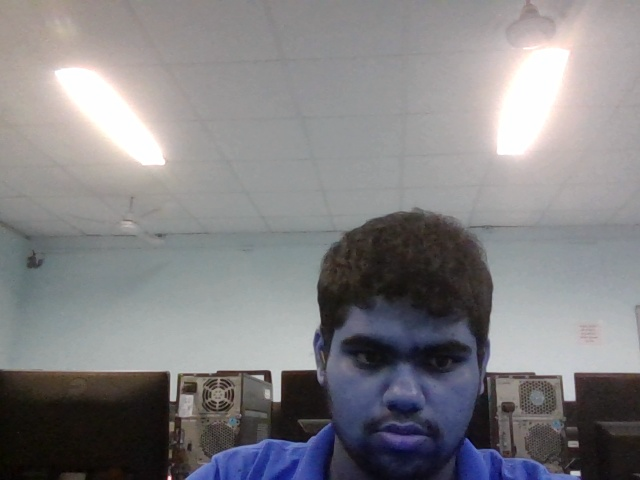

In [25]:
img

In [26]:
with open(os.path.join('Data','train','labels','10a6d220-54ab-11ee-a47d-80d21deeeff4.json')) as f:
  label = json.load(f)

In [27]:
label

{'version': '5.3.1',
 'flags': {},
 'shapes': [{'label': 'face',
   'points': [[317.56097560975616, 207.47967479674796],
    [493.9837398373984, 473.3333333333333]],
   'group_id': None,
   'description': '',
   'shape_type': 'rectangle',
   'flags': {}}],
 'imagePath': '..\\Images\\10a6d220-54ab-11ee-a47d-80d21deeeff4.jpg',
 'imageData': '/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBwcJCQgKDBQNDAsLDBkSEw8UHRofHh0aHBwgJC4nICIsIxwcKDcpLDAxNDQ0Hyc5PTgyPC4zNDL/2wBDAQgJCQwLDBgNDRgyIRwhMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjL/wAARCAHgAoADASIAAhEBAxEB/8QAHwAAAQUBAQEBAQEAAAAAAAAAAAECAwQFBgcICQoL/8QAtRAAAgEDAwIEAwUFBAQAAAF9AQIDAAQRBRIhMUEGE1FhByJxFDKBkaEII0KxwRVS0fAkM2JyggkKFhcYGRolJicoKSo0NTY3ODk6Q0RFRkdISUpTVFVWV1hZWmNkZWZnaGlqc3R1dnd4eXqDhIWGh4iJipKTlJWWl5iZmqKjpKWmp6ipqrKztLW2t7i5usLDxMXGx8jJytLT1NXW19jZ2uHi4+Tl5ufo6erx8vP09fb3+Pn6/8QAHwEAAwEBAQEBAQEBAQAAAAAAAAECAwQFBgcICQoL/8QAtREAAgECBAQDBAcFBAQAAQJ3AAECAxEEBSExBhJBUQdhcRMiMoEIFEKRobHBCSMzUvAVYnLRChYkNOEl8RcYGR

In [28]:
label['shapes'][0]['points']

[[317.56097560975616, 207.47967479674796],
 [493.9837398373984, 473.3333333333333]]

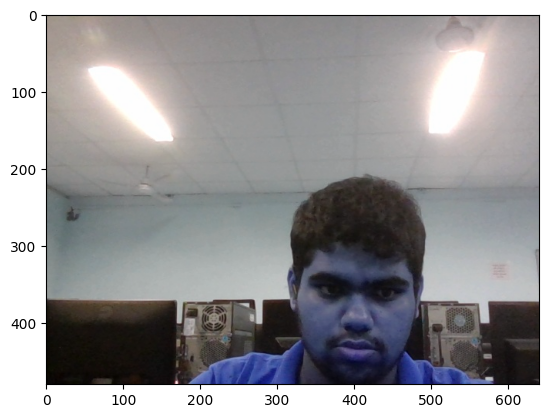

In [29]:
plt.imshow(img)

In [30]:
coords = [0,0,0,0]
coords[0] = label['shapes'][0]['points'][0][0]
coords[1] = label['shapes'][0]['points'][0][1]
coords[2] = label['shapes'][0]['points'][1][0]
coords[3] = label['shapes'][0]['points'][1][1]

In [31]:
coords

[317.56097560975616, 207.47967479674796, 493.9837398373984, 473.3333333333333]

In [32]:
coords = list(np.divide(coords,[640,480,640,480]))

In [33]:
coords

[0.496189024390244, 0.4322493224932249, 0.771849593495935, 0.986111111111111]

In [34]:
augmented = augmentor(image = img, bboxes = [coords], class_labels = ['face'])

In [35]:
augmented

{'image': array([[[192, 184, 191],
         [192, 185, 192],
         [191, 184, 191],
         ...,
         [177, 168, 168],
         [178, 169, 169],
         [181, 170, 170]],
 
        [[192, 185, 190],
         [191, 185, 190],
         [190, 184, 189],
         ...,
         [178, 169, 169],
         [178, 169, 169],
         [180, 169, 169]],
 
        [[195, 187, 192],
         [192, 186, 191],
         [190, 184, 189],
         ...,
         [179, 170, 170],
         [179, 170, 170],
         [183, 171, 171]],
 
        ...,
 
        [[ 64,  48,  50],
         [ 65,  49,  50],
         [ 66,  53,  50],
         ...,
         [ 44,  38,  35],
         [ 45,  39,  36],
         [ 43,  37,  34]],
 
        [[ 69,  52,  55],
         [ 68,  50,  52],
         [ 64,  49,  47],
         ...,
         [ 43,  37,  34],
         [ 43,  37,  34],
         [ 40,  35,  32]],
 
        [[ 66,  50,  53],
         [ 67,  52,  53],
         [ 67,  53,  50],
         ...,
         [ 42,  36,

In [36]:
augmented['image'].shape

(450, 450, 3)

In [37]:
augmented['bboxes']

[(0.17114724480578136, 0.458843721770551, 0.5631978319783196, 1.0)]

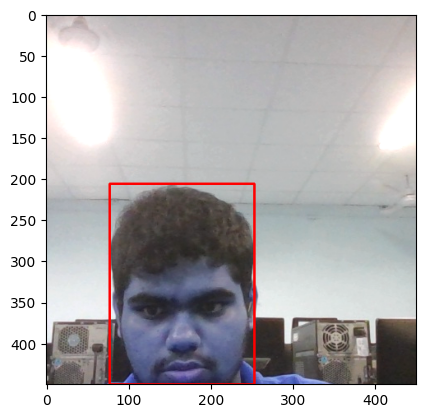

In [38]:
cv2.rectangle(augmented['image'],
              tuple(np.multiply(augmented['bboxes'][0][:2],[450,450]).astype(int)),
              tuple(np.multiply(augmented['bboxes'][0][2:],[450,450]).astype(int)),
              (255,0,0),2)

plt.imshow(augmented['image'])

In [39]:
for folder in ['train','test','val']:
    for image in os.listdir(os.path.join('Data', folder, 'images')):
        img = cv2.imread(os.path.join('Data', folder, 'images', image))

        coords = [0,0,0.000001,0.000001]
        label_path = os.path.join('Data', folder, 'labels', f'{image.split(".")[0]}.json')
        if os.path.exists(label_path):
            with open(label_path, 'r') as f:
                label = json.load(f)

            coords[0] = label['shapes'][0]['points'][0][0]
            coords[1] = label['shapes'][0]['points'][0][1]
            coords[2] = label['shapes'][0]['points'][1][0]
            coords[3] = label['shapes'][0]['points'][1][1]
            coords = list(np.divide(coords, [640,480,640,480]))

        try:
            for x in range(120):
                augmented = augmentor(image=img, bboxes=[coords], class_labels=['face'])
                cv2.imwrite(os.path.join('Aug_data', folder, 'images', f'{image.split(".")[0]}.{x}.jpg'), augmented['image'])
                annotation = {}
                annotation['image'] = image

                if os.path.exists(label_path):
                    if len(augmented['bboxes']) == 0:
                        annotation['bbox'] = [0,0,0,0]
                        annotation['class'] = 0
                    else:
                        annotation['bbox'] = augmented['bboxes'][0]
                        annotation['class'] = 1
                else:
                    annotation['bbox'] = [0,0,0,0]
                    annotation['class'] = 0

                with open(os.path.join('Aug_data', folder, 'labels', f'{image.split(".")[0]}.{x}.json'), 'w') as f:
                    json.dump(annotation, f)

        except Exception as e:
            print(e)

In [40]:
train_images = tf.data.Dataset.list_files('./Aug_data/train/images/*.jpg',shuffle=False)
train_images = train_images.map(load_img)
train_images = train_images.map(lambda x: tf.image.resize(x, (120,120)))
train_images = train_images.map(lambda x: x/255)

In [41]:
len(os.listdir(os.path.join('Aug_data', 'train','labels')))

10920

In [42]:
val_images = tf.data.Dataset.list_files('./Aug_data/val/images/*.jpg',shuffle=False)
val_images = val_images.map(load_img)
val_images = val_images.map(lambda x: tf.image.resize(x, (120,120)))
val_images = val_images.map(lambda x: x/255)

In [43]:
test_images = tf.data.Dataset.list_files('./Aug_data/test/images/*.jpg',shuffle=False)
test_images = test_images.map(load_img)
test_images = test_images.map(lambda x: tf.image.resize(x, (120,120)))
test_images = test_images.map(lambda x: x/255)

In [44]:
train_images.as_numpy_iterator().next()

array([[[6.7395836e-01, 6.7837012e-01, 7.1611518e-01],
        [6.8351716e-01, 6.9528186e-01, 7.2530639e-01],
        [6.6801471e-01, 6.7977941e-01, 7.0723039e-01],
        ...,
        [5.3118873e-01, 5.5324757e-01, 5.5765933e-01],
        [5.3204656e-01, 5.6587011e-01, 5.6636029e-01],
        [5.3216910e-01, 5.6470591e-01, 5.6170344e-01]],

       [[6.8762255e-01, 6.9019610e-01, 7.3725492e-01],
        [7.0588237e-01, 7.1715689e-01, 7.5392157e-01],
        [7.0337009e-01, 7.1464461e-01, 7.5140929e-01],
        ...,
        [5.3333336e-01, 5.5294120e-01, 5.6519610e-01],
        [5.3725493e-01, 5.5686277e-01, 5.7352942e-01],
        [5.4374999e-01, 5.6274509e-01, 5.8462012e-01]],

       [[7.1243870e-01, 7.1243870e-01, 7.5949752e-01],
        [7.1329659e-01, 7.1427697e-01, 7.6182598e-01],
        [7.1519607e-01, 7.2303921e-01, 7.7401960e-01],
        ...,
        [5.4411763e-01, 5.6372547e-01, 5.8725488e-01],
        [5.4852939e-01, 5.6470591e-01, 5.9852940e-01],
        [5.4705882e-01

In [45]:
def load_labels(label_path):
  with open(label_path.numpy(), 'r', encoding='utf-8') as f:
    label = json.load(f)
  return [label['class']], label['bbox']

In [46]:
train_labels = tf.data.Dataset.list_files('./Aug_data/train/labels/*.json',shuffle=False)
train_labels = train_labels.map(lambda x: tf.py_function(load_labels, [x], [tf.uint8, tf.float16]))

In [47]:
val_labels = tf.data.Dataset.list_files('./Aug_data/val/labels/*.json',shuffle=False)
val_labels = val_labels.map(lambda x: tf.py_function(load_labels, [x], [tf.uint8, tf.float16]))

In [48]:
test_labels = tf.data.Dataset.list_files('./Aug_data/test/labels/*.json',shuffle=False)
test_labels = test_labels.map(lambda x: tf.py_function(load_labels, [x], [tf.uint8, tf.float16]))

In [49]:
train_labels.as_numpy_iterator().next()

(array([1], dtype=uint8),
 array([0.2245, 0.4587, 0.6167, 1.    ], dtype=float16))

In [50]:
len(train_images), len(train_labels), len(val_images), len(val_labels), len(test_images), len(test_labels)

(10920, 10920, 2400, 2400, 2280, 2280)

In [51]:
train = tf.data.Dataset.zip((train_images, train_labels))
train = train.shuffle(12000)
train = train.batch(8)
train = train.prefetch(4)

In [52]:
val = tf.data.Dataset.zip((val_images, val_labels))
val = val.shuffle(3000)
val = val.batch(8)
val = val.prefetch(4)

In [53]:
test = tf.data.Dataset.zip((test_images, test_labels))
test = test.shuffle(3000)
test = test.batch(8)
test = test.prefetch(4)

In [54]:
train.as_numpy_iterator().next()

(array([[[[0.5710784 , 0.24166666, 0.13492647],
          [0.5835784 , 0.26593137, 0.15073529],
          [0.5734069 , 0.2557598 , 0.1420343 ],
          ...,
          [0.64479166, 0.28854167, 0.17610294],
          [0.7022059 , 0.35006127, 0.21397059],
          [0.64644605, 0.27506128, 0.17107843]],
 
         [[0.5926471 , 0.27028185, 0.15147059],
          [0.63958335, 0.32634804, 0.19779412],
          [0.5601103 , 0.25030637, 0.12873775],
          ...,
          [0.7002451 , 0.32867646, 0.21740197],
          [0.68688726, 0.33915442, 0.21139705],
          [0.6250613 , 0.26378676, 0.15104167]],
 
         [[0.5921569 , 0.26979166, 0.15159313],
          [0.66023284, 0.34699756, 0.21758579],
          [0.6329044 , 0.32310048, 0.20153186],
          ...,
          [0.7164828 , 0.35220587, 0.21930148],
          [0.68443626, 0.34963235, 0.20502451],
          [0.5751838 , 0.228125  , 0.11556373]],
 
         ...,
 
         [[0.5791054 , 0.5776348 , 0.5898897 ],
          [0.57303

In [55]:
train.as_numpy_iterator().next()[0].shape

(8, 120, 120, 3)

In [56]:
train.as_numpy_iterator().next()[1]

(array([[1],
        [1],
        [1],
        [0],
        [1],
        [1],
        [1],
        [1]], dtype=uint8),
 array([[0.812  , 0.0825 , 1.     , 0.7617 ],
        [0.338  , 0.113  , 0.9    , 0.886  ],
        [0.4692 , 0.2052 , 0.888  , 0.7725 ],
        [0.     , 0.     , 0.     , 0.     ],
        [0.1693 , 0.1444 , 0.704  , 0.8545 ],
        [0.     , 0.1476 , 0.436  , 0.885  ],
        [0.3513 , 0.1196 , 0.913  , 0.893  ],
        [0.353  , 0.09686, 0.8696 , 0.8394 ]], dtype=float16))

In [57]:
img_samples = train.as_numpy_iterator()
res = img_samples.next()

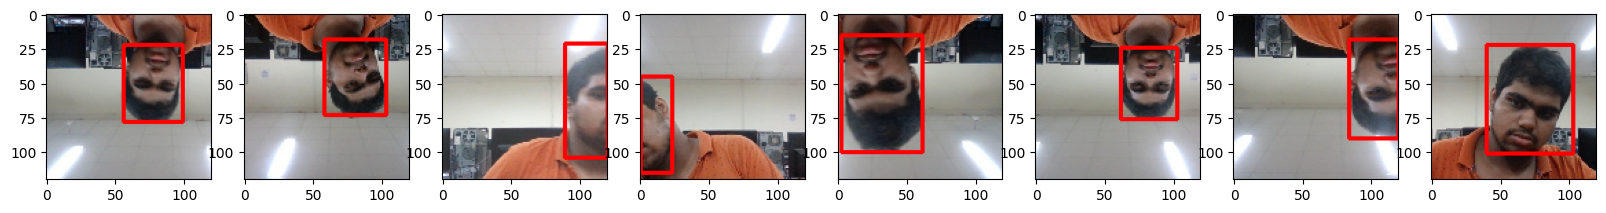

In [58]:
fig, ax = plt.subplots(ncols=8, figsize=(20,20))
for idx in range(8):
  sample_image = res[0][idx]
  sample_coords = res[1][1][idx]

  cv2.rectangle(sample_image,
                tuple(np.multiply(sample_coords[:2], [120,120]).astype(int)),
                tuple(np.multiply(sample_coords[2:], [120,120]).astype(int)),
                (255,0,0), 2)

  ax[idx].imshow(sample_image)
plt.show()

In [59]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Dense, GlobalMaxPooling2D
from tensorflow.keras.applications import VGG16

In [60]:
vgg = VGG16(include_top = False)

In [61]:
vgg.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, None, None, 3)]   0         
                                                                 
 block1_conv1 (Conv2D)       (None, None, None, 64)    1792      
                                                                 
 block1_conv2 (Conv2D)       (None, None, None, 64)    36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, None, None, 64)    0         
                                                                 
 block2_conv1 (Conv2D)       (None, None, None, 128)   73856     
                                                                 
 block2_conv2 (Conv2D)       (None, None, None, 128)   147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, None, None, 128)   0     

In [62]:
def build_model():
  input_layer = Input(shape=(120,120,3))
  vgg = VGG16(include_top = False)(input_layer)

  f1 = GlobalMaxPooling2D()(vgg)
  class1 = Dense(2048, activation = 'relu')(f1)
  class2 = Dense(1, activation='sigmoid')(class1)

  f2 = GlobalMaxPooling2D()(vgg)
  regress1 = Dense(2048, activation='relu')(f2)
  regress2 = Dense(4, activation='sigmoid')(regress1)

  facetracker = Model(inputs = input_layer, outputs = [class2, regress2])
  return facetracker

In [63]:
facetracker = build_model()

In [64]:
facetracker.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 120, 120, 3)]        0         []                            
                                                                                                  
 vgg16 (Functional)          (None, None, None, 512)      1471468   ['input_2[0][0]']             
                                                          8                                       
                                                                                                  
 global_max_pooling2d (Glob  (None, 512)                  0         ['vgg16[0][0]']               
 alMaxPooling2D)                                                                                  
                                                                                              

In [65]:
X,y = train.as_numpy_iterator().next()

In [66]:
X.shape

(8, 120, 120, 3)

In [67]:
classes, coords = facetracker.predict(X)

1/1 [==============================] - 4s 4s/step


In [68]:
classes, coords

(array([[0.43802455],
        [0.49699432],
        [0.46518904],
        [0.5158718 ],
        [0.5231549 ],
        [0.49458483],
        [0.4487989 ],
        [0.5637531 ]], dtype=float32),
 array([[0.48357794, 0.60293436, 0.49618977, 0.50979716],
        [0.406099  , 0.5487472 , 0.419431  , 0.5074173 ],
        [0.44733623, 0.52613616, 0.41256133, 0.5018058 ],
        [0.42621133, 0.56331503, 0.54491216, 0.4801759 ],
        [0.4090725 , 0.60521066, 0.4925342 , 0.4644678 ],
        [0.3794505 , 0.50955313, 0.53049505, 0.52786595],
        [0.38540706, 0.5995665 , 0.46425644, 0.48631924],
        [0.3683619 , 0.6388187 , 0.5187808 , 0.54721653]], dtype=float32))

In [69]:
opt = tf.keras.optimizers.Adam(learning_rate=0.0001)

In [70]:
def localization_loss(y_true, yhat):
    delta_coord = tf.reduce_sum(tf.square(y_true[:,:2] - yhat[:,:2]))

    h_true = y_true[:,3] - y_true[:,1]
    w_true = y_true[:,2] - y_true[:,0]

    h_pred = yhat[:,3] - yhat[:,1]
    w_pred = yhat[:,2] - yhat[:,0]

    delta_size = tf.reduce_sum(tf.square(w_true - w_pred) + tf.square(h_true-h_pred))

    return delta_coord + delta_size

In [71]:
classloss = tf.keras.losses.BinaryCrossentropy()
regressloss = localization_loss

In [72]:
localization_loss(y[1], coords)

<tf.Tensor: shape=(), dtype=float32, numpy=5.5182905>

In [73]:
classloss(y[0], classes)

<tf.Tensor: shape=(), dtype=float32, numpy=0.7177007>

In [74]:
class FaceTracker(Model):
    def __init__(self, tracker,  **kwargs):
        super().__init__(**kwargs)
        self.model = tracker

    def compile(self, opt, classloss, localizationloss, **kwargs):
        super().compile(**kwargs)
        self.closs = classloss
        self.lloss = localizationloss
        self.opt = opt

    def train_step(self, batch, **kwargs):

        X, y = batch

        with tf.GradientTape() as tape:
            classes, coords = self.model(X, training=True)

            batch_classloss = self.closs(y[0], classes)
            batch_localizationloss = self.lloss(tf.cast(y[1], tf.float32), coords)

            total_loss = batch_localizationloss+0.5*batch_classloss

            grad = tape.gradient(total_loss, self.model.trainable_variables)

        opt.apply_gradients(zip(grad, self.model.trainable_variables))

        return {"total_loss":total_loss, "class_loss":batch_classloss, "regress_loss":batch_localizationloss}

    def test_step(self, batch, **kwargs):
        X, y = batch

        classes, coords = self.model(X, training=False)

        batch_classloss = self.closs(y[0], classes)
        batch_localizationloss = self.lloss(tf.cast(y[1], tf.float32), coords)
        total_loss = batch_localizationloss+0.5*batch_classloss

        return {"total_loss":total_loss, "class_loss":batch_classloss, "regress_loss":batch_localizationloss}

    def call(self, X, **kwargs):
        return self.model(X, **kwargs)

In [75]:
model = FaceTracker(facetracker)

In [76]:
model.compile(opt, classloss, regressloss)

In [77]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir = 'logs')

In [78]:
hist = model.fit(train, epochs=10, validation_data = val, callbacks = [tensorboard_callback])

Epoch 1/10
1365/1365 [==============================] - 118s 64ms/step - total_loss: 0.1740 - class_loss: 0.0470 - regress_loss: 0.1504 - val_total_loss: 0.0830 - val_class_loss: 0.0061 - val_regress_loss: 0.0800
Epoch 2/10
1365/1365 [==============================] - 108s 64ms/step - total_loss: 0.0722 - class_loss: 0.0223 - regress_loss: 0.0611 - val_total_loss: 0.0136 - val_class_loss: 0.0023 - val_regress_loss: 0.0125
Epoch 3/10
1365/1365 [==============================] - 107s 64ms/step - total_loss: 0.0697 - class_loss: 0.0214 - regress_loss: 0.0591 - val_total_loss: 0.0201 - val_class_loss: 9.1899e-04 - val_regress_loss: 0.0196
Epoch 4/10
1365/1365 [==============================] - 106s 64ms/step - total_loss: 0.0712 - class_loss: 0.0231 - regress_loss: 0.0596 - val_total_loss: 0.0194 - val_class_loss: 2.6092e-04 - val_regress_loss: 0.0193
Epoch 5/10
1365/1365 [==============================] - 107s 64ms/step - total_loss: 0.0401 - class_loss: 0.0129 - regress_loss: 0.0336 - va

In [79]:
hist.history

{'total_loss': [0.026664678007364273,
  0.015821469947695732,
  0.011785756796598434,
  0.00695795938372612,
  0.011670809239149094,
  0.005597094539552927,
  0.010973778553307056,
  0.08439844846725464,
  0.005812754854559898,
  0.0070265913382172585],
 'class_loss': [9.35352873057127e-05,
  0.00011860443191835657,
  0.0007050746353343129,
  0.0010718161938712,
  8.701258047949523e-05,
  6.258558187255403e-06,
  9.831851639319211e-05,
  0.005768857430666685,
  0.0002934661170002073,
  2.633991425682325e-05],
 'regress_loss': [0.026617910712957382,
  0.015762167051434517,
  0.011433219537138939,
  0.006422051228582859,
  0.011627302505075932,
  0.005593965295702219,
  0.010924619622528553,
  0.08151402324438095,
  0.005666021723300219,
  0.007013421505689621],
 'val_total_loss': [0.08304858207702637,
  0.01362485159188509,
  0.020056163892149925,
  0.019442100077867508,
  0.01069492008537054,
  0.015497810207307339,
  0.01259282510727644,
  0.06592860817909241,
  0.03400811553001404,
 

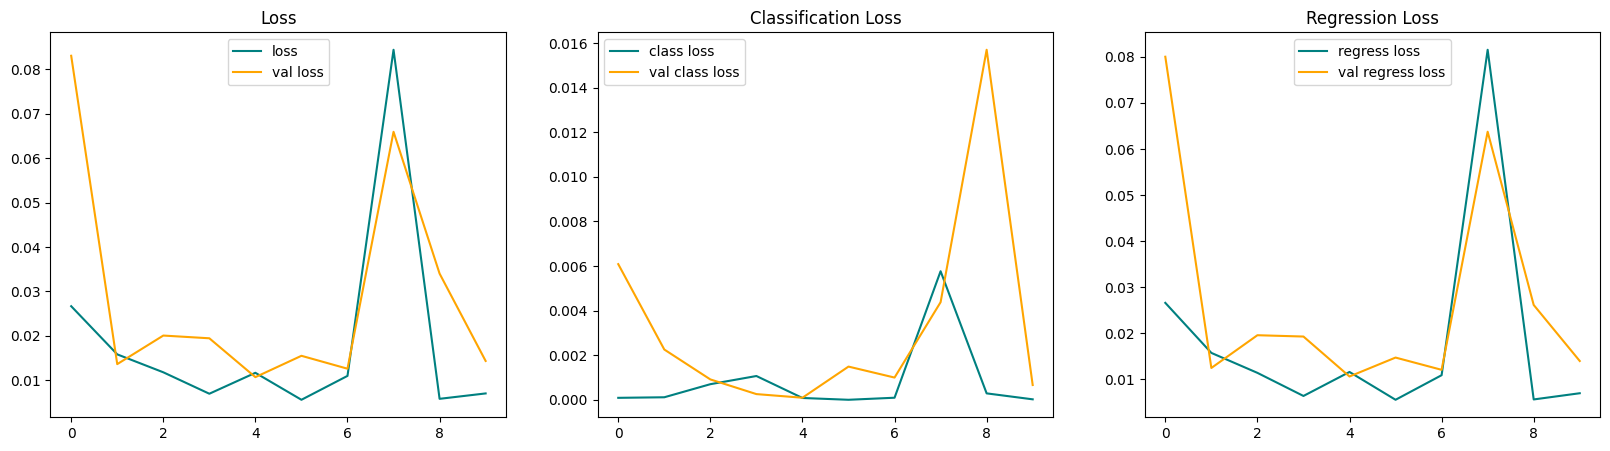

In [80]:
fig, ax = plt.subplots(ncols=3, figsize=(20,5))

ax[0].plot(hist.history['total_loss'], color='teal', label='loss')
ax[0].plot(hist.history['val_total_loss'], color='orange', label='val loss')
ax[0].title.set_text('Loss')
ax[0].legend()

ax[1].plot(hist.history['class_loss'], color='teal', label='class loss')
ax[1].plot(hist.history['val_class_loss'], color='orange', label='val class loss')
ax[1].title.set_text('Classification Loss')
ax[1].legend()

ax[2].plot(hist.history['regress_loss'], color='teal', label='regress loss')
ax[2].plot(hist.history['val_regress_loss'], color='orange', label='val regress loss')
ax[2].title.set_text('Regression Loss')
ax[2].legend()

plt.show()

In [81]:
test_data = test.as_numpy_iterator()

In [82]:
test_sample = test_data.next()

In [83]:
yhat = facetracker.predict(test_sample[0])

1/1 [==============================] - 0s 20ms/step


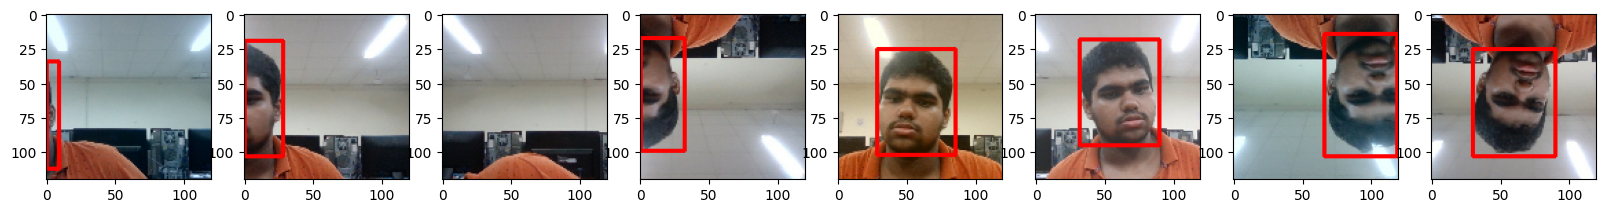

In [84]:
fig, ax = plt.subplots(ncols=8, figsize=(20,20))
for idx in range(8):
    sample_image = test_sample[0][idx]
    sample_coords = yhat[1][idx]

    if yhat[0][idx] > 0.5:
        cv2.rectangle(sample_image,
                      tuple(np.multiply(sample_coords[:2], [120,120]).astype(int)),
                      tuple(np.multiply(sample_coords[2:], [120,120]).astype(int)),
                            (255,0,0), 2)

    ax[idx].imshow(sample_image)

In [85]:
from tensorflow.keras.models import load_model

In [86]:
facetracker.save('facetracker.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [87]:
facetracker = load_model('facetracker.h5')

In [88]:
cap = cv2.VideoCapture(0)
while cap.isOpened():
    _ , frame = cap.read()
    frame = frame[50:500, 50:500,:]

    rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    resized = tf.image.resize(rgb, (120,120))

    yhat = facetracker.predict(np.expand_dims(resized/255,0))
    sample_coords = yhat[1][0]

    if yhat[0] > 0.5:
        # Controls the main rectangle
        cv2.rectangle(frame,
                      tuple(np.multiply(sample_coords[:2], [450,450]).astype(int)),
                      tuple(np.multiply(sample_coords[2:], [450,450]).astype(int)),
                            (255,0,0), 2)
        # Controls the label rectangle
        cv2.rectangle(frame,
                      tuple(np.add(np.multiply(sample_coords[:2], [450,450]).astype(int),
                                    [0,-30])),
                      tuple(np.add(np.multiply(sample_coords[:2], [450,450]).astype(int),
                                    [80,0])),
                            (255,0,0), -1)

        # Controls the text rendered
        cv2.putText(frame, 'face', tuple(np.add(np.multiply(sample_coords[:2], [450,450]).astype(int),
                                               [0,-5])),
                    cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)

    cv2.imshow('EyeTrack', frame)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break


cap.release()
cv2.destroyAllWindows()